# Healthcare - Predicting Diabetes Risk Project

Step 1: Import Libraries

In this step, we will import the necessary libraries for:

- Data manipulation: `pandas`, `numpy`
- Data visualization: `matplotlib`, `seaborn`
- Machine learning: `sklearn` (preprocessing, model building, and evaluation)


In [86]:
import pandas as pd
import numpy as np

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 2: Read Data

Load the dataset `'healthcare_diabetes.csv'` using `pd.read_csv()` and display the first 5 rows to:

- Understand the structure and columns
- Check data types before preprocessing


In [9]:
df=pd.read_csv(r"healthcare_diabetes - healthcare_diabetes.csv")
df

,PatientID,Age,Gender,BMI,BloodPressure,GlucoseLevel,PhysicalActivity,FamilyHistory,Diabetes
0,58ad267f,56,Female,30.5,109,192.0,High,No,1
1,6c7081ea,69,Male,26.3,118,188.0,Medium,Yes,1
2,2a46a9fb,46,Female,26.6,110,187.0,High,Yes,1
3,b726744a,32,Male,25.6,81,90.0,Medium,Yes,0
4,a0c44913,60,Male,28.5,157,95.0,High,No,0
...,...,...,...,...,...,...,...,...,...
505,c5d462bf,57,Female,NaN,152,NaN,Medium,No,0
506,981e29bc,52,Male,NaN,98,NaN,Low,Yes,1
507,5c382b51,77,Male,NaN,88,NaN,Low,No,1
508,969599ac,26,Male,NaN,126,NaN,Low,Yes,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         510 non-null    object 
 1   Age               510 non-null    int64  
 2   Gender            510 non-null    object 
 3   BMI               475 non-null    float64
 4   BloodPressure     510 non-null    int64  
 5   GlucoseLevel      475 non-null    float64
 6   PhysicalActivity  510 non-null    object 
 7   FamilyHistory     510 non-null    object 
 8   Diabetes          510 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 36.0+ KB


In [11]:
df.describe()

,Age,BMI,BloodPressure,GlucoseLevel,Diabetes
count,510.000000,475.000000,510.000000,475.000000,510.000000
mean,49.964706,26.722947,119.786275,134.997895,0.601961
std,18.206055,5.118280,23.715807,38.999540,0.489974
min,18.000000,9.600000,80.000000,71.000000,0.000000
25%,35.000000,23.400000,99.000000,100.000000,0.000000
50%,50.000000,26.800000,119.000000,136.000000,1.000000
75%,66.000000,30.250000,141.000000,170.000000,1.000000
max,79.000000,40.900000,159.000000,199.000000,1.000000


In [18]:
df.describe(include="object")


,PatientID,Gender,PhysicalActivity,FamilyHistory
count,510,510,510,510
unique,500,2,3,2
top,5c382b51,Female,Low,Yes
freq,2,255,179,267


In [13]:
df.isnull().sum()

PatientID            0
Age                  0
Gender               0
BMI                 35
BloodPressure        0
GlucoseLevel        35
PhysicalActivity     0
FamilyHistory        0
Diabetes             0
dtype: int64

In [14]:
df.sample(5)

,PatientID,Age,Gender,BMI,BloodPressure,GlucoseLevel,PhysicalActivity,FamilyHistory,Diabetes
183,0cbf9085,56,Male,33.5,155,121.0,Medium,Yes,1
43,35276ef2,33,Female,26.3,115,111.0,High,Yes,0
284,957df50d,19,Female,21.1,155,182.0,High,No,1
144,12078eeb,52,Female,24.2,87,148.0,High,Yes,1
502,926b466d,72,Female,NaN,147,NaN,Low,No,1


In [16]:
df.dtypes

PatientID            object
Age                   int64
Gender               object
BMI                 float64
BloodPressure         int64
GlucoseLevel        float64
PhysicalActivity     object
FamilyHistory        object
Diabetes              int64
dtype: object

## Step 3: Data Preprocessing

In this step, we will clean and prepare the data for analysis and modeling:

 **Check and remove duplicates** using `.duplicated()` and `.drop_duplicates()`.

 **Check and handle null values**:
- Use `.isnull().sum()` to detect missing values.
- Fill missing numerical columns with the **median**.

 **Encode categorical variables**:
- Columns to encode: `'Gender'`, `'PhysicalActivity'`, `'FamilyHistory'`.
- Use `LabelEncoder` or `pd.get_dummies()` to transform them into numerical format.


In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
505     True
506     True
507     True
508     True
509     True
Length: 510, dtype: bool

In [22]:
df.drop_duplicates
df


,PatientID,Age,Gender,BMI,BloodPressure,GlucoseLevel,PhysicalActivity,FamilyHistory,Diabetes
0,58ad267f,56,Female,30.5,109,192.0,High,No,1
1,6c7081ea,69,Male,26.3,118,188.0,Medium,Yes,1
2,2a46a9fb,46,Female,26.6,110,187.0,High,Yes,1
3,b726744a,32,Male,25.6,81,90.0,Medium,Yes,0
4,a0c44913,60,Male,28.5,157,95.0,High,No,0
...,...,...,...,...,...,...,...,...,...
505,c5d462bf,57,Female,NaN,152,NaN,Medium,No,0
506,981e29bc,52,Male,NaN,98,NaN,Low,Yes,1
507,5c382b51,77,Male,NaN,88,NaN,Low,No,1
508,969599ac,26,Male,NaN,126,NaN,Low,Yes,0


In [46]:
y = df[["BMI","GlucoseLevel"]].median()
df.fillna({("BMI","GlucoseLevel"):y},inplace = True)
df.dropna(inplace = True)
df.isnull().sum()



PatientID           0
Age                 0
Gender              0
BMI                 0
BloodPressure       0
GlucoseLevel        0
PhysicalActivity    0
FamilyHistory       0
Diabetes            0
dtype: int64

In [61]:
label_encode = LabelEncoder()

df['Gender'] = label_encode.fit_transform(df['Gender'])
df['PhysicalActivity'] = label_encode.fit_transform(df['PhysicalActivity'])
df['FamilyHistory'] = label_encode.fit_transform(df['FamilyHistory'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         475 non-null    object 
 1   Age               475 non-null    int64  
 2   Gender            475 non-null    int64  
 3   BMI               475 non-null    float64
 4   BloodPressure     475 non-null    int64  
 5   GlucoseLevel      475 non-null    float64
 6   PhysicalActivity  475 non-null    int64  
 7   FamilyHistory     475 non-null    int64  
 8   Diabetes          475 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 37.1+ KB


,PatientID,Age,Gender,BMI,BloodPressure,GlucoseLevel,PhysicalActivity,FamilyHistory,Diabetes
0,58ad267f,56,0,30.5,109,192.0,0,0,1
1,6c7081ea,69,1,26.3,118,188.0,2,1,1
2,2a46a9fb,46,0,26.6,110,187.0,0,1,1
3,b726744a,32,1,25.6,81,90.0,2,1,0
4,a0c44913,60,1,28.5,157,95.0,0,0,0
...,...,...,...,...,...,...,...,...,...
494,9a1e8676,57,0,32.0,86,167.0,2,1,1
496,4c2c37ee,41,0,23.8,80,194.0,0,0,1
497,418b2c07,67,1,29.4,123,155.0,0,0,1
498,ce389ebd,49,1,25.1,124,145.0,0,0,1


## Step 4: Exploratory Data Analysis (EDA)

We will explore the dataset to gain insights and visualize relationships.

**Questions to explore:**

**Q1:** Does age affect diabetes risk?  
- Group by `'Diabetes'` and calculate the mean `'Age'`.

**Q2:** Does high glucose level increase diabetes risk?  
- Use a **boxplot** of `'GlucoseLevel'` vs `'Diabetes'`.

**Q3:** How does BMI vary between diabetic and non-diabetic patients?  
- Group by `'Diabetes'` and calculate the mean `'BMI'`.
- Visualize using a **boxplot**.

**Q4:** Does physical activity level affect diabetes risk?  
- Group by `'PhysicalActivity'` and calculate diabetes rates.

**Visualizations:**

- Histograms for numerical columns.
- Countplots for categorical columns.
- Boxplots to compare distributions across diabetes status.


In [51]:
df.groupby('Diabetes')['Age'].mean()


Diabetes
0    50.388601
1    49.322695
Name: Age, dtype: float64

<Axes: xlabel='Diabetes', ylabel='GlucoseLevel'>

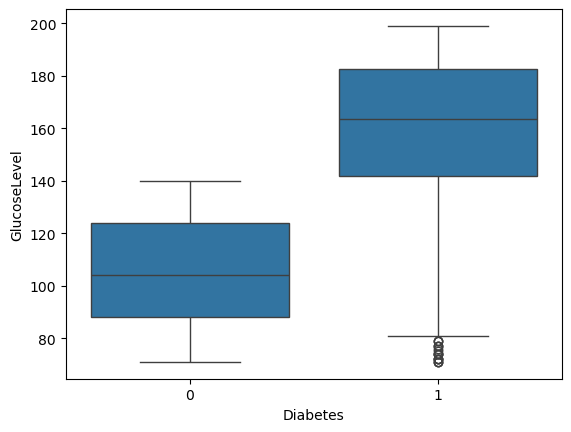

In [56]:
df.groupby('Diabetes')['GlucoseLevel'].mean()
sns.boxplot(x = df['Diabetes'],y=df['GlucoseLevel'])

In [58]:
df.groupby('Diabetes')['BMI'].mean()

Diabetes
0    24.358549
1    28.341135
Name: BMI, dtype: float64

<Axes: xlabel='Diabetes', ylabel='BMI'>

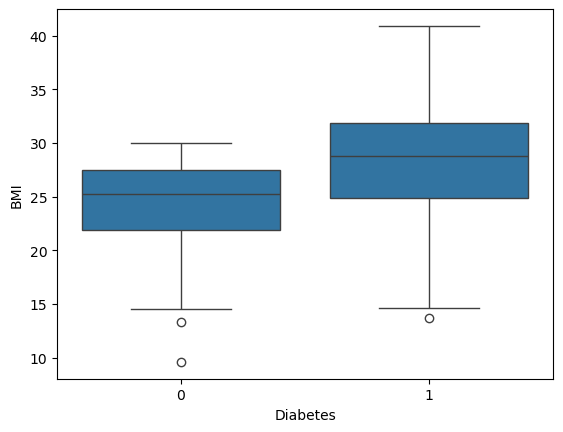

In [59]:
sns.boxplot(x = df['Diabetes'],y=df['BMI'])

In [65]:
df.groupby('PhysicalActivity')['Diabetes'].sum()

PhysicalActivity
0     96
1    103
2     83
Name: Diabetes, dtype: int64

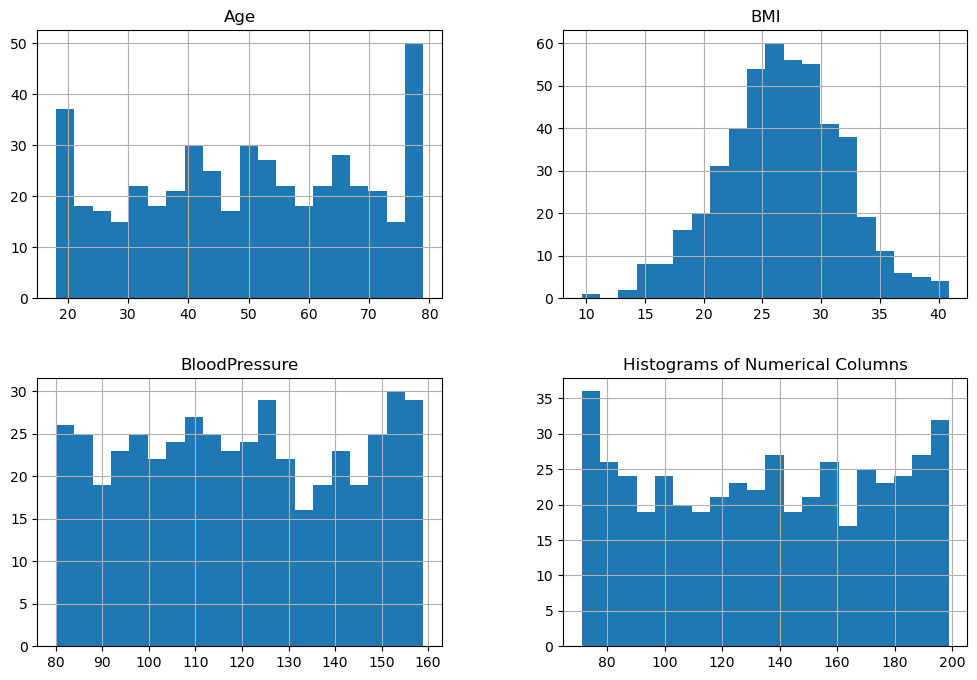

In [91]:
df[['Age', 'BMI', 'BloodPressure', 'GlucoseLevel']].hist(bins=20, figsize=(12, 8))
plt.title('Histograms of Numerical Columns')
plt.show()

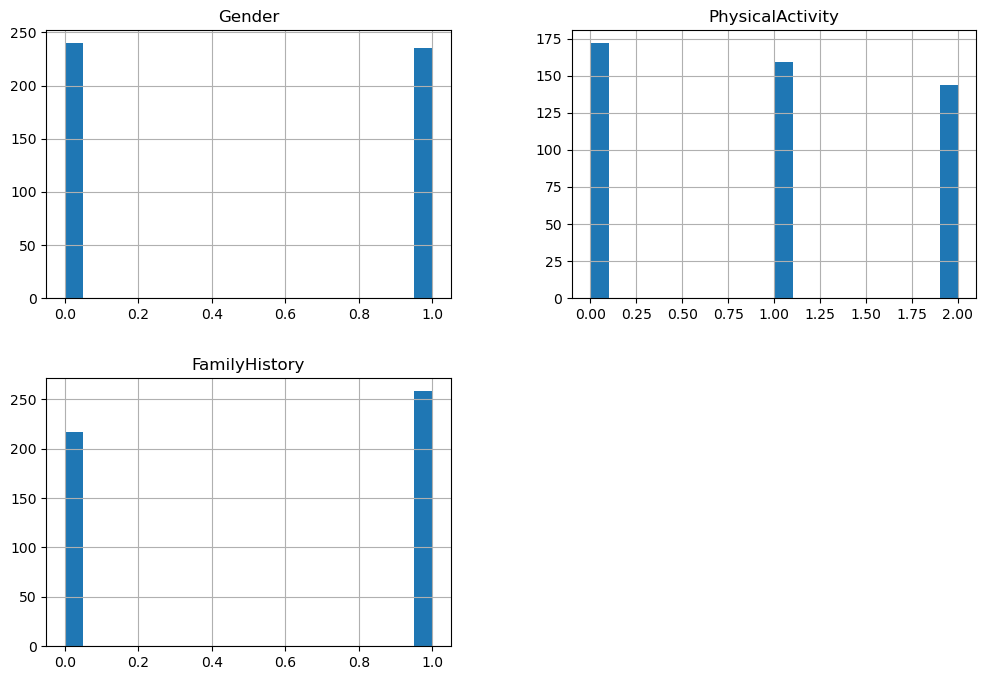

In [93]:
df[['Gender', 'PhysicalActivity', 'FamilyHistory']].hist(bins=20, figsize=(12, 8))
sns.countplot(x =['Gender', 'PhysicalActivity', 'FamilyHistory'])

plt.show()


## Step 5: GroupBy Practice

Practice using `groupby` to extract insights:

- Group by `'PhysicalActivity'`.
- Calculate the **average `'GlucoseLevel'`** and **average `'BMI'`** for each group to observe patterns related to physical activity.


In [95]:
df.groupby('PhysicalActivity')[['GlucoseLevel', 'BMI']].mean()

,GlucoseLevel,BMI
PhysicalActivity,,
0,133.395349,26.836628
1,138.641509,26.948428
2,132.888889,26.338194


<Axes: >

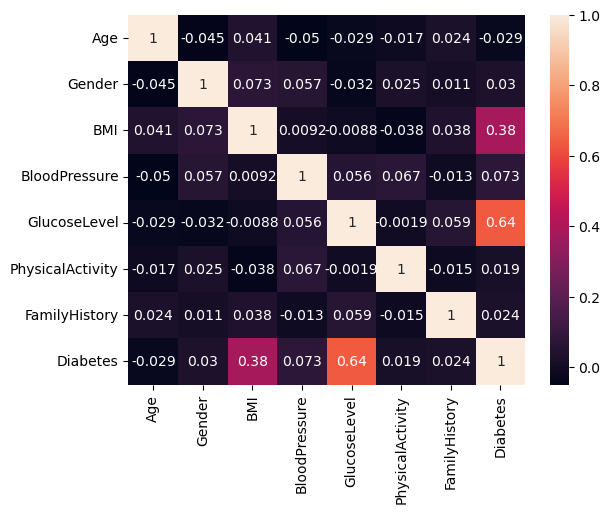

In [100]:
sns.heatmap(df.drop(columns=['PatientID']).corr(), annot=True)

## Step 6: Model Building

Build a **Classification Model** to predict diabetes:

**Feature selection:**  
Use relevant features:
- `'Age'`, `'Gender'`, `'BMI'`, `'BloodPressure'`, `'GlucoseLevel'`, `'PhysicalActivity'`, `'FamilyHistory'`.

**Split the data:**
- Use `train_test_split` to create training and testing sets.

**Train the model:**
- Initialize and train a `Logistic Regression & Decision Tree`(Optional) on the training data.


In [98]:
a=df[['Age', 'Gender', 'BMI', 'BloodPressure', 'GlucoseLevel', 'PhysicalActivity', 'FamilyHistory']]
b=df["Diabetes"]

In [101]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [102]:
Scalar = StandardScaler()
a_train = Scalar.fit_transform(a_train)
a_test = Scalar.transform(a_test)


In [103]:
regression_model = LinearRegression()
regression_model.fit(a_train, a_train)

LinearRegression()

In [104]:
b_pred = regression_model.predict(a_test)
b_pred

array([[ 0.2933191 , -0.97916438,  0.69436871, -1.17808637, -0.48219361,
        -1.19009747, -1.09968283],
       [-0.31036079,  1.02127898,  1.64616093,  0.10820657,  1.02474543,
         0.03880753, -1.09968283],
       [-0.7494007 ,  1.02127898, -2.31640258,  0.23683587,  1.51003089,
         1.26771253, -1.09968283],
       [ 1.55555887,  1.02127898,  0.90803635,  0.79422948, -0.89085504,
         1.26771253, -1.09968283],
       [ 1.61043886,  1.02127898, -1.55885367, -0.62069276, -0.27786289,
         0.03880753, -1.09968283],
       [ 0.62259904, -0.97916438, -0.17972618,  1.05148806, -0.60990031,
        -1.19009747,  0.90935311],
       [-0.85916068,  1.02127898, -1.11209406, -1.60685068, -0.27786289,
        -1.19009747,  0.90935311],
       [-0.20060081, -0.97916438,  0.22818477,  1.60888167,  0.53945998,
         0.03880753,  0.90935311],
       [ 1.50067888,  1.02127898, -0.52936413, -0.10617558,  0.00309185,
         1.26771253,  0.90935311],
       [-0.80428069,  1.0212

In [110]:
regression_model=LogisticRegression(max_iter=1000)
regression_model.fit(a_train, b_train)


LogisticRegression(max_iter=1000)

In [111]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(a_train, b_train)

DecisionTreeClassifier(random_state=42)

## Step 7: Model Evaluation

Evaluate the model’s performance using:

**Accuracy Score** for overall performance.  
**Classification Report** to view precision, recall, and F1-score.  
**Confusion Matrix** to visualize true vs. predicted classes.

(Optional) Visualize **feature importances** to understand which features impact diabetes prediction the most.


In [115]:
b_pred=regression_model.predict(a_test)

In [122]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(a_train, b_train)

DecisionTreeClassifier(random_state=42)

In [124]:
lr_predictions = regression_model.predict(a_test)

In [130]:
accuracy_score=(b_test, lr_predictions)
accuracy_score

(393    1
 443    1
 10     1
 78     1
 368    0
       ..
 437    1
 44     0
 209    0
 163    1
 257    0
 Name: Diabetes, Length: 95, dtype: int64,
 array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0]))

In [132]:
classification_report=(b_test, lr_predictions)
classification_report

(393    1
 443    1
 10     1
 78     1
 368    0
       ..
 437    1
 44     0
 209    0
 163    1
 257    0
 Name: Diabetes, Length: 95, dtype: int64,
 array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0]))

In [133]:
confusion_matrix=(b_test, lr_predictions)
confusion_matrix

(393    1
 443    1
 10     1
 78     1
 368    0
       ..
 437    1
 44     0
 209    0
 163    1
 257    0
 Name: Diabetes, Length: 95, dtype: int64,
 array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0]))

In [138]:
descision_tree_predictions = dt_model.predict(a_test)
accuracy_score=(b_test, descision_tree_predictions)
accuracy_score


(393    1
 443    1
 10     1
 78     1
 368    0
       ..
 437    1
 44     0
 209    0
 163    1
 257    0
 Name: Diabetes, Length: 95, dtype: int64,
 array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0]))

In [140]:
classification_report=(b_test, descision_tree_predictions)
classification_report

(393    1
 443    1
 10     1
 78     1
 368    0
       ..
 437    1
 44     0
 209    0
 163    1
 257    0
 Name: Diabetes, Length: 95, dtype: int64,
 array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0]))

In [141]:
confusion_matrix=(b_test, descision_tree_predictions)
confusion_matrix

(393    1
 443    1
 10     1
 78     1
 368    0
       ..
 437    1
 44     0
 209    0
 163    1
 257    0
 Name: Diabetes, Length: 95, dtype: int64,
 array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0]))

In [147]:
features = ['Age', 'Gender', 'BMI', 'BloodPressure', 'GlucoseLevel', 'PhysicalActivity', 'FamilyHistory']
feature_importance = pd.DataFrame({ 'Feature': features,'Importance': dt_model.feature_importances_})  .sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
4,GlucoseLevel,0.575565
2,BMI,0.424435
0,Age,0.000000
1,Gender,0.000000
3,BloodPressure,0.000000
5,PhysicalActivity,0.000000
6,FamilyHistory,0.000000


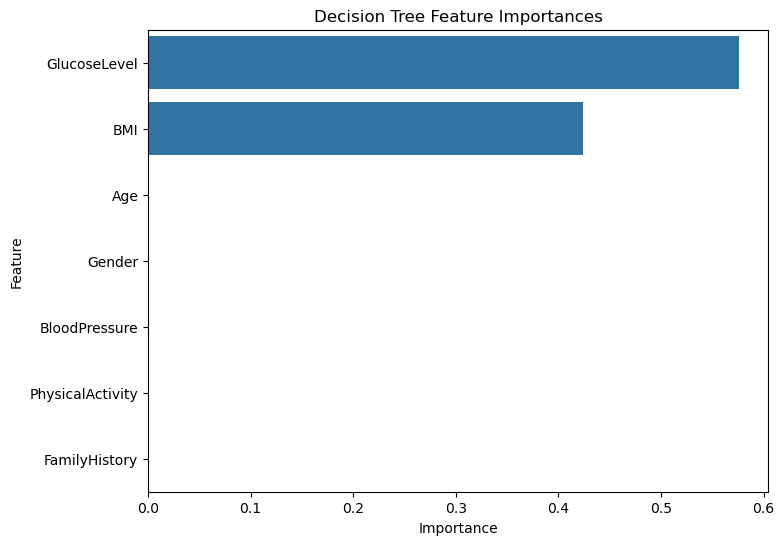

In [148]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Decision Tree Feature Importances')
plt.show()